бывает обучение с учителем:
- задачи классификации (метки: дискретные 2илиболее )
- задачи регрессии (метки/результат:непрерывные величины)

обучение без учителя:
- моделирование признаков без меток
- служат для выявления структуры немаркированных данных
ЗАДАЧА:
-- кластеризации(выделение отделбных групп данных)
-- понижения размерности(поиск более сжатого представления данных)

частичное обучение(semi-supervised learn):
не все данные промаркированы

Методы обучения с подкреплением:
система обучения улучшает свои характеристики засчет взаимодействия со средой

In [8]:
import seaborn as sns

iris = sns.load_dataset('iris')
print(iris.head())
print(type(iris)) #dataframe
print(type(iris.values))
print(iris.values.shape)
print(iris.columns)
print(iris.index)


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(150, 5)
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
RangeIndex(start=0, stop=150, step=1)


матрица признаков(features matrix), размер:[число образцов x число признаков]
целевой массив, массив меток(targets) - одномерный массив[1 x число образцов] - данные которые хотим предсказать на основе имеющихся данных

- ПРОЦЕСС ПОСТРОЕНИЯ СИСТЕМЫ МАШИННОГО ОБУЧЕНИЯ:
1) обработка данных
    (обработанные данные делятся на тестовый и обучающий набор данных)
2) обучение моделей
3) оценка и формирование модели
4) прогнозирование (использование модели)


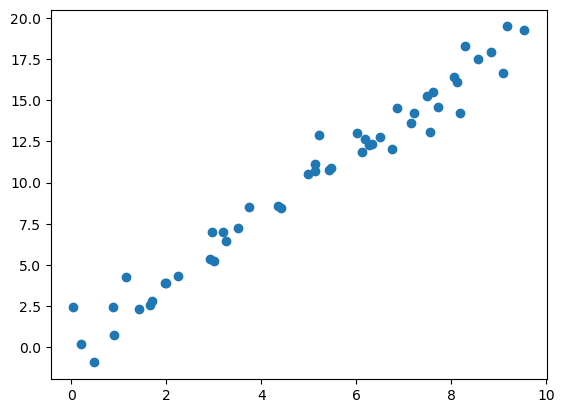

In [21]:
#обучение с учителем пример линейной регрессии
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(10)
x = 10 * np.random.rand(50)
y = 2*x + np.random.randn(50)
plt.scatter(x,y)
plt.show()


In [18]:
'''выбираем класс модели'''
from sklearn.linear_model import LinearRegression

'''устанавливаем гиперпараметры модели'''
model = LinearRegression()

X = x[:, np.newaxis]


'''обучение модели'''
model.fit(X,y)
print(model.coef_[0])   #а близко к 2
print(model.intercept_) #b близко к нулю

1.971519295945321
0.18453672391648368


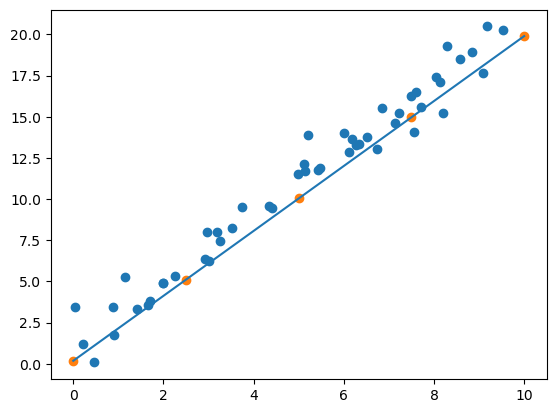

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(10)
x = 10 * np.random.rand(50)
y = 2*x +1 + np.random.randn(50)
plt.scatter(x,y)
# plt.show()

x_ = np.linspace(0, 10, 30)
y_ = model.coef_[0] *x_+model.intercept_

xfit = np.linspace(0,10 ,5)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(xfit, yfit)

plt.plot(x_, y_)

- ЛЕКЦИЯ 3.2 ПРО ЛИНЕЙНУЮ РЕГРЕССИЮ 

--------------------------------------------------------------------

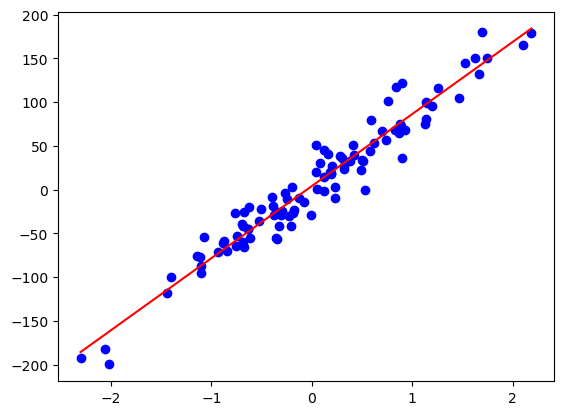

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import  LinearRegression

'''sample - 100 элементов, features - 5 признаков, '''
features, target = make_regression(
    n_samples=100,n_features=1, n_informative=1, n_targets=1, noise=20,random_state = 1)

model = LinearRegression().fit(features, target)
plt.scatter(features, target, color='blue')


x = np.linspace(features.min(), features.max(), 100)
#y = kx+b
plt.plot(x, model.coef_[0]*x+ model.intercept_, color='red')

plt.show()



-  ПРОСТАЯ ЛИНЕЙНАЯ РЕГРЕССИЯ
    линейная->линейная зависимость

In [ ]:
data = np.array(
    [
    [1,5],
    [2,7],
    [3,7],
    [4,8],
    [5,10],
    [6,14],
    [7,18],
    [8,20],
    [9,24],
    [10,28]
    ]
)

x = data[:, 0]#все строки по нулевому столбцу
y = data[:, 1]
n = len(x)

w1 = (n*sum(x[i]*y[i] for i in range(n)) 
      -sum(x[i] for i in range(n))*sum(y[i] for i in range(n))
      )/(n*sum(x[i]**2 for i in range(n))
         -(sum(x[i] for i in range(n)))**2)
w0=sum(y[i] for i in range(n))/n - w1*(sum(x[i] for i in range(n))/n)

print(w1, w0)
#2.5757575757575757 -0.06666666666666643



2.5757575757575757 -0.06666666666666643


-   МЕТОД ОБРАТНЫХ МАТРИЦ

In [55]:
from numpy.linalg import inv, qr
x1 = np.vstack([x, np.ones(len(x))]).T
w = inv(x1.transpose() @ x1) @ (x1.transpose()@ y)
print(w)

[ 2.57575758 -0.06666667]


- РАЗЛОЖЕНИЕ МАТРИЦ(QR разложения) минимизация ошибки вычисления


In [ ]:
Q, R = qr(x1)
w = inv(R).dot(Q.transpose()).dot(y)
print(w)

[ 2.57575758 -0.06666667]


- ГРАДИЕНТНЫЙ СПУСК
    

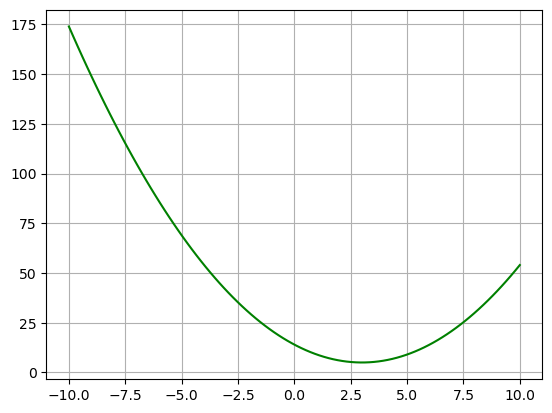

In [63]:
def f(x):
    return (x-3)**2+5
x = np.linspace(-10, 10, 100)
plt.plot(x, f(x), color = 'green')
plt.grid()
plt.show() 

- ЛЕКЦИЯ 3.3

In [69]:
data = np.array(
    [
    [1,5],
    [2,7],
    [3,7],
    [4,8],
    [5,10],
    [6,14],
    [7,18],
    [8,20],
    [9,24],
    [10,28]
    ]
)

x = data[:, 0]
y = data[:, 1]
n = len(x)

W1 = 0.0
W0 = 0.0 
iterations = 100_000
L =0.001
sample_size =1
for i in range(iterations):
    idx = np.random.choice(n, sample_size, replace = False)
  
    Dw0 = 2 * sum(-y[idx] + w0 + w1 * x[idx])
    Dw1 = 2* sum((x[idx] * (-y[idx] + w0 + w1 * x[idx])))
    w1 -= L * Dw1
    W0 -= L * Dw0

print(w1,w0)

2.661147778054022 -0.06666666666666643


In [ ]:
import pandas as pd

data_df = pd.DataFrame(data)
print(data_df.corr(method="pearson"))
'''это че то типо корреляции, она
 помогает выяснить есть ли связь между двумя переменными '''


          0         1
0  1.000000  0.972367
1  0.972367  1.000000
          0         1
0  1.000000  0.988826
1  0.988826  1.000000
          0         1
0  1.000000  0.996965
1  0.996965  1.000000


1) 2/3 данных на обучение, остальное на тест
2) 4/5 и 1/5
3) 9/10 и 1/10

In [83]:
from sklearn.model_selection import train_test_split
X = data_df.values[:, :-1]
Y= data_df.values[:, -1]
print(X)
print(Y)
print('\n')

x_train,x_test,y_train, y_test=train_test_split(X, Y, test_size= 1/3 )
print(x_train)
print(y_train)

print(x_test)
print(y_test)


[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[ 5  7  7  8 10 14 18 20 24 28]


[[3]
 [9]
 [5]
 [7]
 [8]
 [4]]
[ 7 24 10 18 20  8]
[[10]
 [ 1]
 [ 6]
 [ 2]]
[28  5 14  7]


In [85]:
'''далее выбирается модель'''
model = LinearRegression()
model.fit(x_train, y_train)

r = model.score(x_test, y_test)
r

0.8453806907378338

   x1  x2   y
0   0  22  88
1   1  13  62
2   1  15  67
3   1  14  62
4   2  18  77
[2.00672647 3.00203798] 20.10943282003599


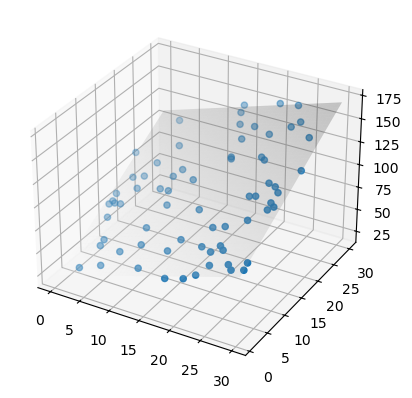

In [97]:
data_df = pd.read_csv('multiple_independent_variable_linear.csv')
print(data_df.head())
X = data_df.values[:, :-1]
Y= data_df.values[:, -1]
model = LinearRegression().fit(X,Y)
print(model.coef_, model.intercept_)

x1 = X[:, 0]
x2 = X[:, 1]
y = Y

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x1,x2,y)

x1_ = np.linspace(min(x1), max(x1), 100)
x2_ = np.linspace(min(x2), max(x2), 100)

X1_, X2_ = np.meshgrid(x1_, x2_)

Y_ = model.intercept_+ model.coef_[0]*X1_+model.coef_[1]*X2_

ax.plot_surface(X1_, X2_, Y_, cmap='Greys', alpha=0.2)

plt.show()